In [142]:
import utils
import re
import numpy as np
from collections import namedtuple

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, clear_output
from time import sleep
from tqdm import tqdm_notebook

# Day 11 Chronal Charge

We have a `300x300` grid of fuel cells, and we can select any `3x3` grid of cells.

Each cell has a power of:

Find the fuel cell's rack ID, which is its X coordinate plus 10.
Begin with a power level of the rack ID times the Y coordinate.
Increase the power level by the value of the grid serial number (your puzzle input).
Set the power level to itself multiplied by the rack ID.
Keep only the hundreds digit of the power level (so 12345 becomes 3; numbers with no hundreds digit become 0).
Subtract 5 from the power level.

**Whats the x,y coordinate of the 3x3 cell with the most power?**

In [2]:
inp = 1308

In [157]:
def hundreds(n):
    """returns the 100th digit of a number n"""
    n = n // 100
    if n >= 1:
        return int(str(n)[-1])
    else:
        return 0

hundreds(99), hundreds(100), hundreds(943)

(0, 1, 9)

In [158]:
def get_power(x,y, inp):
    """takes in a x,y and input and returns the power at that location"""
    rack_id = x + 10
    power = rack_id * y + inp
    power *= rack_id
    power = hundreds(power) - 5
    return power

assert get_power(3,5, 8) == 4
assert get_power(122,79,57) == -5
assert get_power(217,196,39) == 0
assert get_power(101,153,71) == 4

So our get_power function is working properly, so now to fill in the power for the grid:

In [7]:
def make_grid(size=300, inp=inp):
    """makes grid and fills it with power levels"""
    grid = np.zeros(shape=(size+1,size+1))
    
    for x, y in np.ndindex(grid.shape):
        grid[y,x] = get_power(x,y, inp)
        
    return grid

grid = make_grid()
grid

array([[-5., -2.,  1., ...,  3., -4., -1.],
       [-4.,  0.,  3., ...,  2.,  1.,  0.],
       [-3.,  1.,  4., ...,  0., -4.,  1.],
       ...,
       [ 3., -1.,  1., ..., -2.,  0., -3.],
       [ 4.,  0.,  2., ..., -3.,  4., -2.],
       [-5.,  1.,  3., ..., -5., -1., -1.]])

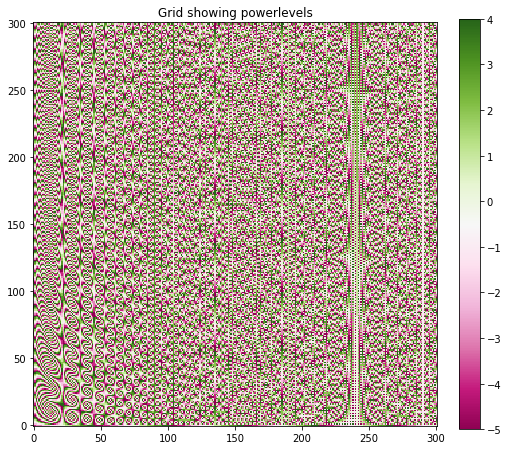

In [80]:
def show(grid=grid):
    """takes in a grid and plots it"""
    fig, ax = plt.subplots(figsize=(8,8))
    pos = ax.imshow(grid, cmap=plt.cm.PiYG, origin='lower')
    ax.set_title(f"Grid showing powerlevels")
    fig.colorbar(pos, ax=ax, fraction=0.046)
    plt.show()

show()

For grid serial number 18, the largest total 3x3 square has a top-left corner of 33,45 (with a total power of 29); these fuel cells appear in the middle of this 5x5 region:

In [105]:
def get_x_power(x,y, grid, size=3):
    """takes in x,y pos, a grid and size of square to return power"""
    return grid[y:y+size, x:x+size].sum()

grid = make_grid(inp=42)
assert get_x_power(x=21,y=61, grid=grid) == 30

grid = make_grid(inp=18)
assert get_x_power(33,45, grid) == 29

Finally, moving to to answer the question:

In [97]:
def solve(inp=18, viz=False):
    grid = make_grid(inp=inp)
    xx, yy = 0, 0
    max_power = 0
    
    for x, y in np.ndindex(grid.shape):
        power = get_x_power(x, y, grid)
        if power > max_power:
            xx, yy = x, y
            max_power = power
    
    if viz: show()
    
    return f"Coordinates ({xx}, {yy}) have max power: {max_power}"

solve(42), solve(18)

('Coordinates (21, 61) have max power: 30.0',
 'Coordinates (33, 45) have max power: 29.0')

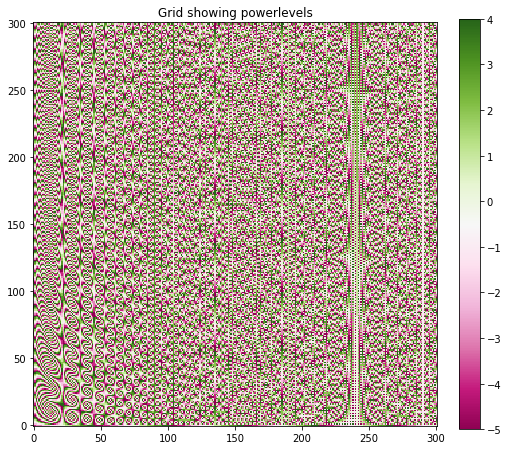

'Coordinates (21, 41) have max power: 31.0'

In [73]:
solve(inp=1308, viz=True)

# Part 2

Now we can select a square of any size, upto 300x300, so now we want to find the largest such square and return the answer in the form x,y,area.

So for every x,y point, find all possible squares.

- For grid serial number 18, the largest total square (with a total power of 113) is 16x16 and has a top-left corner of 90,269, so its identifier is 90,269,16.
- For grid serial number 42, the largest total square (with a total power of 119) is 12x12 and has a top-left corner of 232,251, so its identifier is 232,251,12.

So for every x,y position I want to generate all possible squares and get their powers:

In [146]:
g = np.arange(0,9).reshape(3,3)
g

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [153]:
grid.shape

(301, 301)

In [151]:
g[0:3,0:3]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

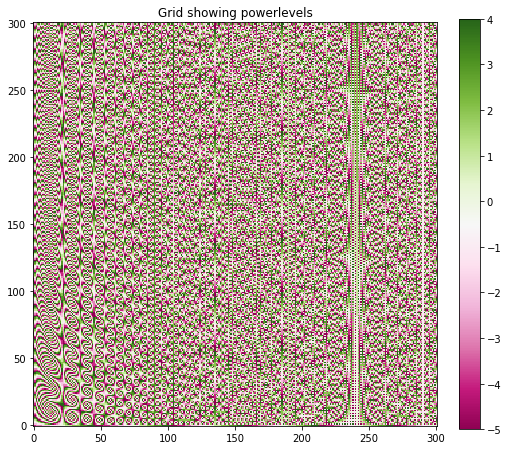

Coordinates (227, 199) of size 19 have max power: 103.0


(227, 199, 19)

In [156]:
def solve2(inp=18, viz=False):
    grid = make_grid(inp=inp)
    xx, yy = 0, 0
    max_power = 0
    max_size = 0
    
    for x, y in tqdm_notebook(np.ndindex(grid.shape)):
        max_side = max(x,y)
        sizes = np.arange(1, grid.shape[0]+1 - max_side)
        powers = [get_x_power(x,y, grid, s) for s in sizes]
        
        if np.max(powers) > max_power:
            xx, yy = x, y
            max_power = np.max(powers)
            max_size = sizes[np.argmax(powers)]
    
    if viz: show()
    
    print(f"Coordinates ({xx}, {yy}) of size {max_size} have max power: {max_power}")
    return xx,yy,max_size

#solve2(18) # 90,269,16
solve2(inp=1308, viz=True)